## Real World/Buisness Objectives and constraints

1. The cost of misclassification is very high
2. we take probability score and set a threshold 
3. No strict lattency concern
4. Interpretablity is partially important

## Type of Problem and Performance Metrices-

It is a binary classification problem, but we want a probability value

Performance metrices- 
1. Log loss
2. Binary Confusion matrix

## Train and Test Construction

We build a randomly splitted data with 70:30 train:test ratio

#  Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("Data/train.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


1. There is 1 question missing in question1 and 2 in question2


### Dropped NaN rows

In [5]:
df.dropna(how='any',axis = 0,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [7]:
data = df

In [8]:
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [9]:
data.shape

(404287, 6)

In [10]:
qid1 = (data.qid1.values)
qid2 = (data.qid2.values)
len(qid1)

404287

In [11]:
id_series = pd.Series(qid1.tolist()+qid2.tolist())

In [12]:
id_series

0              1
1              3
2              5
3              7
4              9
           ...  
808569    379845
808570    155606
808571    537929
808572    537931
808573    537933
Length: 808574, dtype: int64

In [13]:
id_series.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537929, dtype: int64

### Number of unique and repeated questions

In [14]:
unique_que = len(np.unique(id_series))


one_occur_que = (id_series.value_counts()[id_series.value_counts()==1])

number_one_occur_que=len(one_occur_que)


que_more_than_one = unique_que - number_one_occur_que



max_que=id_series.value_counts().index[0]
que=data['question1'][data['qid1']==2559]
que.iloc[0]

'What are the best ways to lose weight?'

In [15]:
print('Total number of unique questions {}'.format(unique_que))
print("="*50)
print('Total number of question with one occurance {}'.format(number_one_occur_que))
print("="*50)
print('Total number of questions with more than one occurance {}'.format(que_more_than_one))
print("="*50)
print('Question with maximum occurence is - "{}" and it occured {} times'.format(que.iloc[0],id_series.value_counts().iloc[0]))

Total number of unique questions 537929
Total number of question with one occurance 426151
Total number of questions with more than one occurance 111778
Question with maximum occurence is - "What are the best ways to lose weight?" and it occured 157 times


# 

### Count of class labels 0 or 1

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

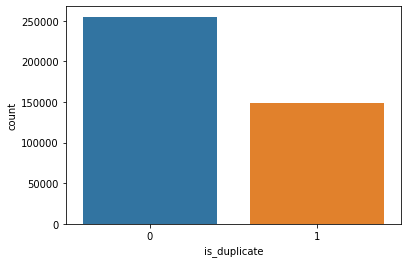

In [16]:
is_duplicate_counts = data.is_duplicate.value_counts()
sns.countplot(x='is_duplicate',data=data)

In [17]:
print('Number of dissimilar questions - {} ({})'.format(is_duplicate_counts.iloc[0],(is_duplicate_counts.iloc[0]/len(data))))
print("="*50)
print('Number of similar questions - {} ({})'.format(is_duplicate_counts.iloc[1],(is_duplicate_counts.iloc[1]/len(data))))

Number of dissimilar questions - 255024 (0.630799407351708)
Number of similar questions - 149263 (0.3692005926482919)


## Feature Extraction

1. q1_len - length of question 1
2. q2_len - length of question 2
3. r_len - ratio of lengths
3. r_words - Ratio of words in both questions
4. c_words - Number of common words in both questions

In [18]:
x = data
y = data.iloc[:,-1]
x.reset_index(inplace = True)
x.drop(['index'],axis=1,inplace = True)

In [19]:
x

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404282,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404283,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404284,404287,537928,537929,What is one coin?,What's this coin?,0
404285,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [20]:
def feature_extraction(df):

    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['r_len'] = df['q1len']/df['q2len']
    df.drop(['q1len','q2len'],axis = 1,inplace = True)

    l_q1 = (df['question1'].str.split())
    for i in range(0,len(l_q1)):
        l_q1[i]=(len(l_q1[i])) 
        

    l_q2 = (df['question2'].str.split())
    for i in range(0,len(l_q2)):
        l_q2[i]=(len(l_q2[i])) 
    
    df['q1_words']=l_q1
    df['q2_words']=l_q2
    return(df)

In [21]:
x = feature_extraction(x)

In [22]:
x

,id,qid1,qid2,question1,question2,is_duplicate,r_len,q1_words,q2_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1.157895,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0.579545,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1.237288,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.769231,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1.948718,13,7
...,...,...,...,...,...,...,...,...,...
404282,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,1.075949,14,13
404283,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,0.976190,8,9
404284,404287,537928,537929,What is one coin?,What's this coin?,0,1.000000,4,3
404285,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,0.740157,17,25


In [23]:
def common_words(x):
    l_1 = x['question1'].str.lower().str.split()
    l_2 = x['question2'].str.lower().str.split()
    len_common=[]
    for i in range(len(l_1)):
        l_1[i] = set(l_1[i])
        l_2[i] = set(l_2[i])
        len_common.append(len(l_1[i] & l_2[i]))
    x['c_words'] = len_common
    return(x)

In [24]:
x = common_words(x)

In [25]:
x

,id,qid1,qid2,question1,question2,is_duplicate,r_len,q1_words,q2_words,c_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1.157895,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0.579545,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1.237288,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.769231,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1.948718,13,7,2
...,...,...,...,...,...,...,...,...,...,...
404282,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,1.075949,14,13,11
404283,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,0.976190,8,9,5
404284,404287,537928,537929,What is one coin?,What's this coin?,0,1.000000,4,3,1
404285,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,0.740157,17,25,1


In [26]:
x['c_words'].value_counts()

4     61520
3     58837
5     55383
2     48997
6     42948
1     34338
7     29065
0     22366
8     17592
9      9829
10     5743
11     3799
12     3260
13     2616
14     2290
15     1689
16     1398
17      676
19      658
18      639
20      205
22      136
21      115
23       74
24       40
25       20
27       18
26       16
30        4
29        4
28        3
33        2
38        2
31        2
35        1
41        1
34        1
Name: c_words, dtype: int64

Text(0, 0.5, 'Common words')

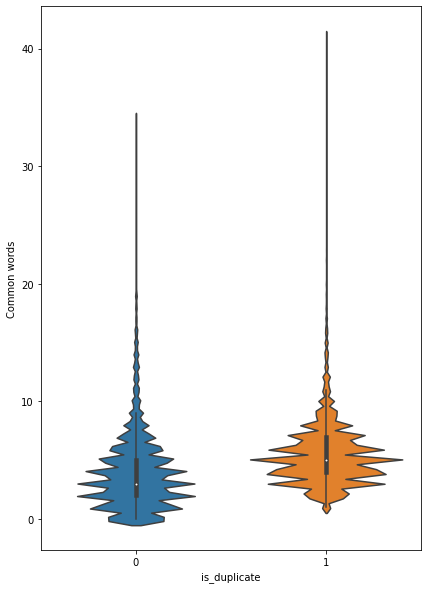

In [27]:
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
sns.violinplot(x = data['is_duplicate'], y = x['c_words'])
plt.ylabel('Common words')

C:\Users\Aakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Aakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

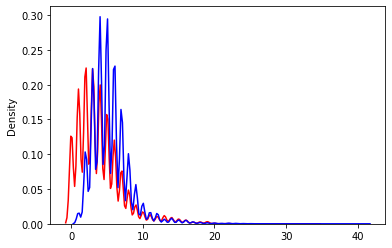

In [28]:
sns.distplot(x =x[x['is_duplicate']==0]['c_words'], label='0',color = 'red',hist = False)
sns.distplot(x =x[x['is_duplicate']==1]['c_words'], label='1',color = 'blue',hist = False)

No conclusion can be taken out of distribution and violin plot of common words

In [29]:
x.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'r_len',
       'q1_words', 'q2_words', 'c_words'],
      dtype='object')

In [30]:
x.iloc[:,6:10]

,r_len,q1_words,q2_words,c_words
0,1.157895,14,12,10
1,0.579545,8,13,4
2,1.237288,14,10,4
3,0.769231,11,9,0
4,1.948718,13,7,2
...,...,...,...,...
404282,1.075949,14,13,11
404283,0.976190,8,9,5
404284,1.000000,4,3,1
404285,0.740157,17,25,1


In [31]:
x.to_csv('Data/unprocessed_train.csv')

## Preprocessing of question
     
     1. Removing special characters
     2. Removing HTML tags using BeautifulSoup
     3. Performing stemming using Porter Stemmer
     

In [36]:
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
def preprocess(x):
    x = x.lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                               .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                               .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                               .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                               .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                               .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                               .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x = re.sub('[^a-zA-Z]',' ',str(x))
    x = re.sub('[^a-zA-Z]',' ',str(x))

    soup = BeautifulSoup(x,'lxml')
    x = soup.text
    
    ps = PorterStemmer()
    words = word_tokenize(x)
    l = []
    for i in words:
        l.append(ps.stem(i))
    x = " ".join([str(e) for e in l])
    
    return(x)

In [37]:
from tqdm.notebook import tqdm
tqdm.pandas()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(x):
    x = x.lower()
    STOP_WORDS = stopwords.words('english')
    STOP_WORDS.remove('not')
    STOP_WORDS.remove('no')
    words = word_tokenize(x)
    sent = ' '
    for w in words:
        if w in STOP_WORDS:
            continue
        sent = sent + w+" "
    return(sent)
        
    

In [38]:
x

,id,qid1,qid2,question1,question2,is_duplicate,r_len,q1_words,q2_words,c_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1.157895,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0.579545,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1.237288,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.769231,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1.948718,13,7,2
...,...,...,...,...,...,...,...,...,...,...
404282,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,1.075949,14,13,11
404283,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,0.976190,8,9,5
404284,404287,537928,537929,What is one coin?,What's this coin?,0,1.000000,4,3,1
404285,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,0.740157,17,25,1


In [43]:
x['question1'] = x['question1'].progress_apply(remove_stopwords)
x['question2'] = x['question2'].progress_apply(remove_stopwords)
x

  0%|          | 0/404287 [00:00<?, ?it/s]

  0%|          | 0/404287 [00:00<?, ?it/s]

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,r_len,q1_words,q2_words,c_words
0,0,0,1,2,step step guide invest share market india ?,step step guide invest share market ?,0,1.157895,14,12,10
1,1,1,3,4,story kohinoor ( koh-i-noor ) diamond ?,would happen indian government stole kohinoor...,0,0.579545,8,13,4
2,2,2,5,6,increase speed internet connection using vpn ?,internet speed increased hacking dns ?,0,1.237288,14,10,4
3,3,3,7,8,mentally lonely ? solve ?,find remainder [ math ] 23^ { 24 } [ /math ] ...,0,0.769231,11,9,0
4,4,4,9,10,"one dissolve water quikly sugar , salt , meth...",fish would survive salt water ?,0,1.948718,13,7,2
...,...,...,...,...,...,...,...,...,...,...,...
404282,404282,404285,433578,379845,many keywords racket programming language lat...,many keywords perl programming language lates...,0,1.075949,14,13,11
404283,404283,404286,18840,155606,believe life death ?,true life death ?,1,0.976190,8,9,5
404284,404284,404287,537928,537929,one coin ?,'s coin ?,0,1.000000,4,3,1
404285,404285,404288,537930,537931,approx annual cost living studying uic chicag...,little hairfall problem want use hair styling...,0,0.740157,17,25,1


In [45]:
x.to_csv('Data/stopwords_removed.csv')


In [46]:
from tqdm.notebook import tqdm
tqdm.pandas()
x['question1'] = x['question1'].progress_apply(preprocess)
x['question2'] = x['question2'].progress_apply(preprocess)
    

    

  0%|          | 0/404287 [00:00<?, ?it/s]

  0%|          | 0/404287 [00:00<?, ?it/s]

In [48]:
x

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,r_len,q1_words,q2_words,c_words
0,0,0,1,2,step step guid invest share market india,step step guid invest share market,0,1.157895,14,12,10
1,1,1,3,4,stori kohinoor koh i noor diamond,would happen indian govern stole kohinoor koh ...,0,0.579545,8,13,4
2,2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dn,0,1.237288,14,10,4
3,3,3,7,8,mental lone solv,find remaind math math divid,0,0.769231,11,9,0
4,4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0,1.948718,13,7,2
...,...,...,...,...,...,...,...,...,...,...,...
404282,404282,404285,433578,379845,mani keyword racket program languag latest ver...,mani keyword perl program languag latest version,0,1.075949,14,13,11
404283,404283,404286,18840,155606,believ life death,true life death,1,0.976190,8,9,5
404284,404284,404287,537928,537929,one coin,own coin,0,1.000000,4,3,1
404285,404285,404288,537930,537931,approx annual cost live studi uic chicago indi...,littl hairfal problem want use hair style prod...,0,0.740157,17,25,1


In [49]:
from thefuzz import fuzz
from thefuzz import process
from tqdm.notebook import tqdm
tqdm.pandas()

x["token_set_ratio"]       = x.progress_apply(lambda d: fuzz.token_set_ratio(d["question1"], d["question2"]), axis=1)
x["token_sort_ratio"]      = x.progress_apply(lambda d: fuzz.token_sort_ratio(d["question1"], d["question2"]), axis=1)
x["fuzz_ratio"]            = x.progress_apply(lambda d: fuzz.QRatio(d["question1"], d["question2"]), axis=1)
x["fuzz_partial_ratio"]    = x.progress_apply(lambda d: fuzz.partial_ratio(d["question1"], d["question2"]), axis=1)


  0%|          | 0/404287 [00:00<?, ?it/s]

  0%|          | 0/404287 [00:00<?, ?it/s]

  0%|          | 0/404287 [00:00<?, ?it/s]

  0%|          | 0/404287 [00:00<?, ?it/s]

In [50]:
x

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,r_len,q1_words,q2_words,c_words,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio
0,0,0,1,2,step step guid invest share market india,step step guid invest share market,0,1.157895,14,12,10,100,92,92,100
1,1,1,3,4,stori kohinoor koh i noor diamond,would happen indian govern stole kohinoor koh ...,0,0.579545,8,13,4,90,63,63,94
2,2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dn,0,1.237288,14,10,4,85,74,56,60
3,3,3,7,8,mental lone solv,find remaind math math divid,0,0.769231,11,9,0,26,27,27,31
4,4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0,1.948718,13,7,2,53,42,42,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,404282,404285,433578,379845,mani keyword racket program languag latest ver...,mani keyword perl program languag latest version,0,1.075949,14,13,11,95,88,92,90
404283,404283,404286,18840,155606,believ life death,true life death,1,0.976190,8,9,5,80,62,75,80
404284,404284,404287,537928,537929,one coin,own coin,0,1.000000,4,3,1,88,88,88,88
404285,404285,404288,537930,537931,approx annual cost live studi uic chicago indi...,littl hairfal problem want use hair style prod...,0,0.740157,17,25,1,37,37,36,41


In [51]:
# from tqdm.notebook import tqdm
# tqdm.pandas()
# x['question1'] = x.progress_apply(lambda d: preprocess(d['question1']),axis = 1)
# x['question2'] = x.progress_apply(lambda d: preprocess(d['question2']), axis = 1)
    

    

In [52]:
x

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,r_len,q1_words,q2_words,c_words,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio
0,0,0,1,2,step step guid invest share market india,step step guid invest share market,0,1.157895,14,12,10,100,92,92,100
1,1,1,3,4,stori kohinoor koh i noor diamond,would happen indian govern stole kohinoor koh ...,0,0.579545,8,13,4,90,63,63,94
2,2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dn,0,1.237288,14,10,4,85,74,56,60
3,3,3,7,8,mental lone solv,find remaind math math divid,0,0.769231,11,9,0,26,27,27,31
4,4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0,1.948718,13,7,2,53,42,42,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,404282,404285,433578,379845,mani keyword racket program languag latest ver...,mani keyword perl program languag latest version,0,1.075949,14,13,11,95,88,92,90
404283,404283,404286,18840,155606,believ life death,true life death,1,0.976190,8,9,5,80,62,75,80
404284,404284,404287,537928,537929,one coin,own coin,0,1.000000,4,3,1,88,88,88,88
404285,404285,404288,537930,537931,approx annual cost live studi uic chicago indi...,littl hairfal problem want use hair style prod...,0,0.740157,17,25,1,37,37,36,41


In [53]:
x.columns

Index(['Unnamed: 0', 'id', 'qid1', 'qid2', 'question1', 'question2',
       'is_duplicate', 'r_len', 'q1_words', 'q2_words', 'c_words',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio'],
      dtype='object')

In [54]:
x.drop('Unnamed: 0',axis = 1,inplace = True)

In [55]:
x.to_csv('Data/Preprocessed_with_fuzz.csv',index = False)

In [56]:
x

,id,qid1,qid2,question1,question2,is_duplicate,r_len,q1_words,q2_words,c_words,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio
0,0,1,2,step step guid invest share market india,step step guid invest share market,0,1.157895,14,12,10,100,92,92,100
1,1,3,4,stori kohinoor koh i noor diamond,would happen indian govern stole kohinoor koh ...,0,0.579545,8,13,4,90,63,63,94
2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dn,0,1.237288,14,10,4,85,74,56,60
3,3,7,8,mental lone solv,find remaind math math divid,0,0.769231,11,9,0,26,27,27,31
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0,1.948718,13,7,2,53,42,42,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,404285,433578,379845,mani keyword racket program languag latest ver...,mani keyword perl program languag latest version,0,1.075949,14,13,11,95,88,92,90
404283,404286,18840,155606,believ life death,true life death,1,0.976190,8,9,5,80,62,75,80
404284,404287,537928,537929,one coin,own coin,0,1.000000,4,3,1,88,88,88,88
404285,404288,537930,537931,approx annual cost live studi uic chicago indi...,littl hairfal problem want use hair style prod...,0,0.740157,17,25,1,37,37,36,41
